Zomato Restaurant Data: Exploratory Data Analysis

This project performs an in-depth Exploratory Data Analysis (EDA) on a Zomato restaurant dataset. The goal is to uncover key trends, relationships, and insights that influence a restaurant's popularity and customer satisfaction. The analysis aims to answer questions like: What factors drive popularity? Are online orders more prevalent than table bookings? And what are the typical distributions of ratings and costs?

In [16]:
import pandas as pd
import numpy as np                      #importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("Downloads/Zomato-data-.csv")  #loading the dataset

In [18]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [19]:
print(data.isna().sum())  #Basic Info & Null Values
data.shape

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


(148, 7)

In [20]:
data.info

<bound method DataFrame.info of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet 

#  Data Cleaning

In [21]:
data["online_order"] = data["online_order"].map({"Yes": 1, "No": 0})
data["book_table"]=data["book_table"].map({"Yes":1,"No":0})    ## Convert Yes/No to 1/0 for make computation easier            

data = data.rename(columns={"approx_cost(for two people)": "avg_amt_spent"}) #rename a columns

data["rate"] = data["rate"].astype(str).str.replace("/5", "").str.strip()
data["rate"] = data["rate"].astype(float)   ## Clean rating column

data.sort_values(by="votes", ascending=False)

,name,online_order,book_table,rate,votes,avg_amt_spent,listed_in(type)
38,Empire Restaurant,1,0,4.4,4884,750,other
86,Meghana Foods,1,0,4.4,4401,600,Dining
7,Onesta,1,1,4.6,2556,600,Cafes
44,Onesta,1,1,4.6,2556,600,other
65,Kabab Magic,1,0,4.1,1720,400,Dining
...,...,...,...,...,...,...,...
140,Darkolates,0,0,3.3,0,200,Dining
143,Melting Melodies,0,0,3.3,0,100,Dining
142,Gawdaru Mane Beriyani,0,0,3.3,0,300,Dining
141,Swaada Healthy Kitchen,0,0,3.3,0,350,Dining


#  Top Restaurants by Votes

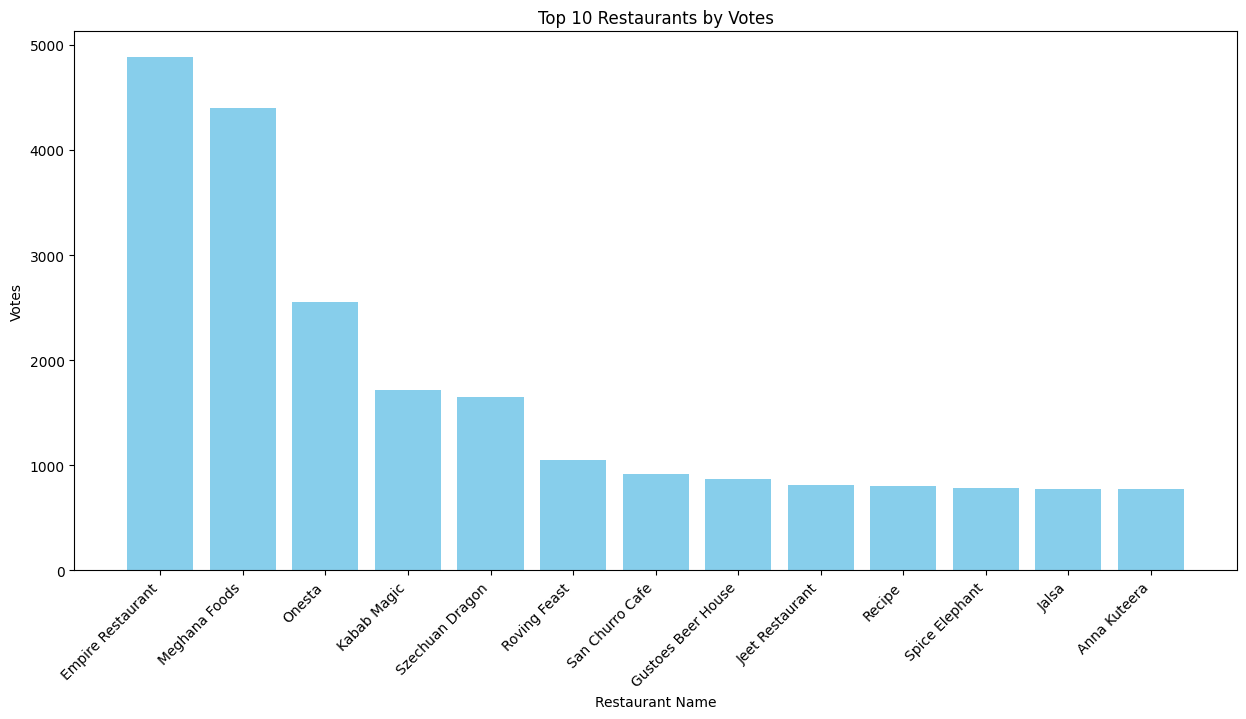

In [22]:
top15_shops = data.nlargest(15, "votes")
plt.figure(figsize=(15,7))
plt.bar(top15_shops["name"],top15_shops["votes"],color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Restaurant Name")
plt.ylabel("Votes")
plt.title("Top 10 Restaurants by Votes")
plt.show()



#  Online Order Availability

In [23]:
counts = data["online_order"].value_counts()
print(counts)
print(counts.index)
print(counts.values)

online_order
0    90
1    58
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='online_order')
[90 58]


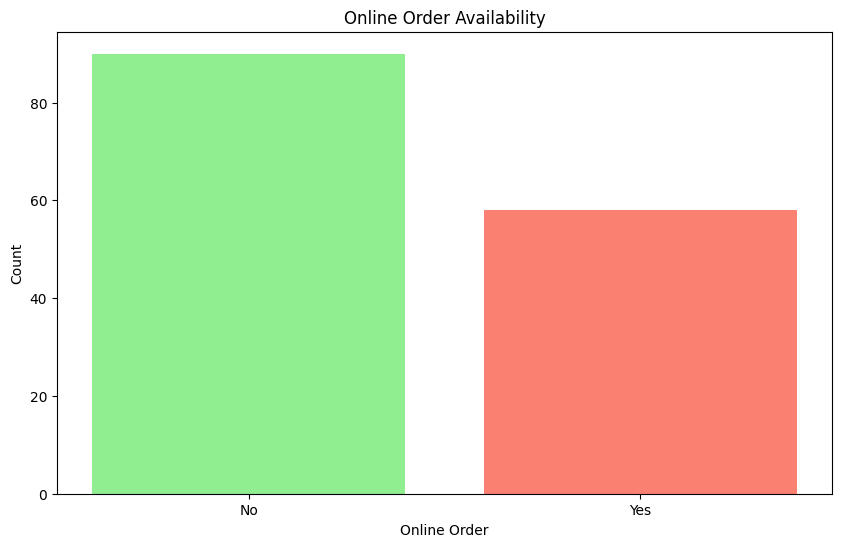

In [24]:
counts = data["online_order"].map({1: "Yes", 0: "No"}).value_counts()

plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color=["lightgreen","salmon"])
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.title("Online Order Availability")
plt.show()

# . Hotel Type vs Votes

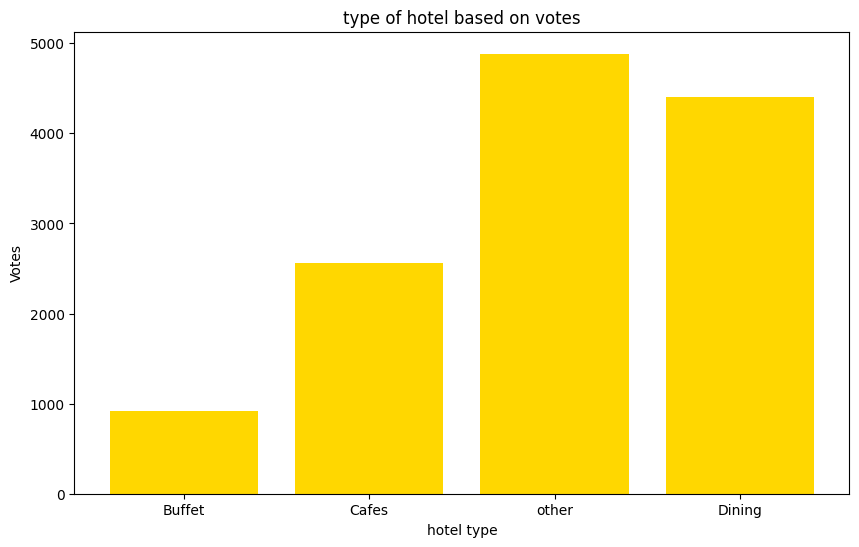

In [25]:
plt.figure(figsize=(10,6))
plt.bar(data["listed_in(type)"],data["votes"],color='gold')
plt.xlabel("hotel type")
plt.ylabel("Votes")
plt.title("type of hotel based on votes")
plt.show()


#  Budget Analysis

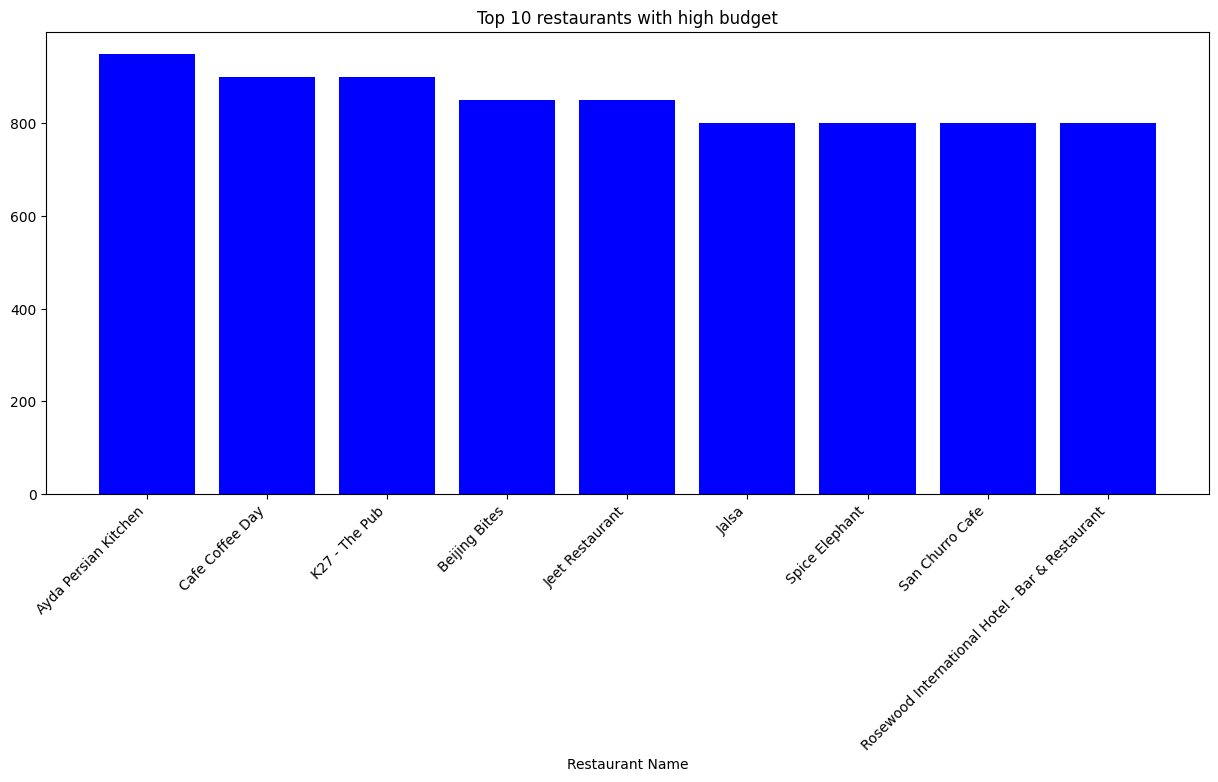

In [26]:
top10_budget=data.nlargest(10,"avg_amt_spent")
plt.figure(figsize=(15,6))
plt.bar(top10_budget["name"],top10_budget["avg_amt_spent"],color='blue')
plt.xticks(rotation=45, ha="right")                                    ## Top 10 High Budget
plt.xlabel("Restaurant Name")
plt.title("Top 10 restaurants with high budget")
plt.show()


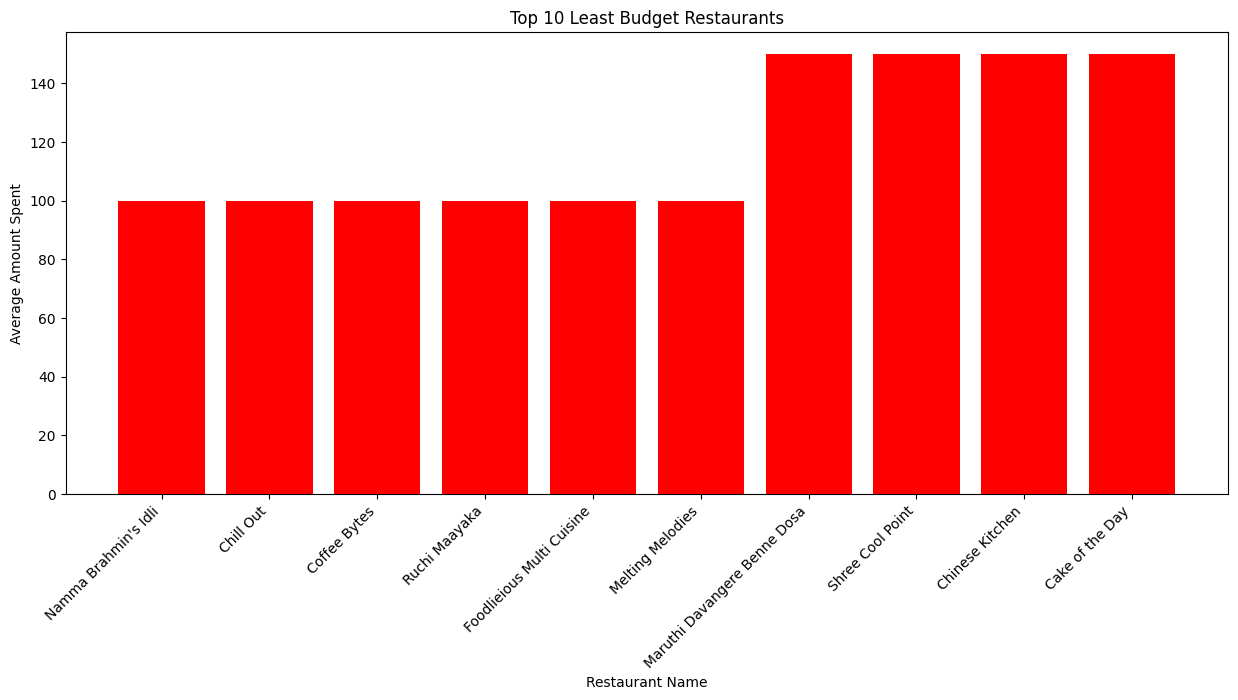

In [27]:
top10_least_budget = data.nsmallest(10, "avg_amt_spent")

plt.figure(figsize=(15,6))
plt.bar(top10_least_budget["name"], top10_least_budget["avg_amt_spent"], color='red') #top low budget restaurants
plt.xticks(rotation=45, ha="right")
plt.xlabel("Restaurant Name")
plt.ylabel("Average Amount Spent")
plt.title("Top 10 Least Budget Restaurants")
plt.show()

#  Correlation Analysis

                   rate     votes  avg_amt_spent
rate           1.000000  0.489844       0.275216
votes          0.489844  1.000000       0.324372
avg_amt_spent  0.275216  0.324372       1.000000


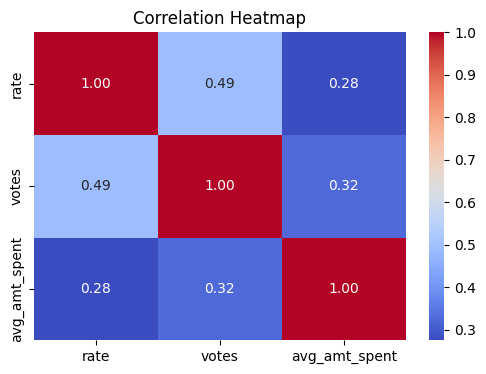

In [28]:
corr = data[["rate", "votes", "avg_amt_spent"]].corr()
print(corr)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


 # Distribution analysis

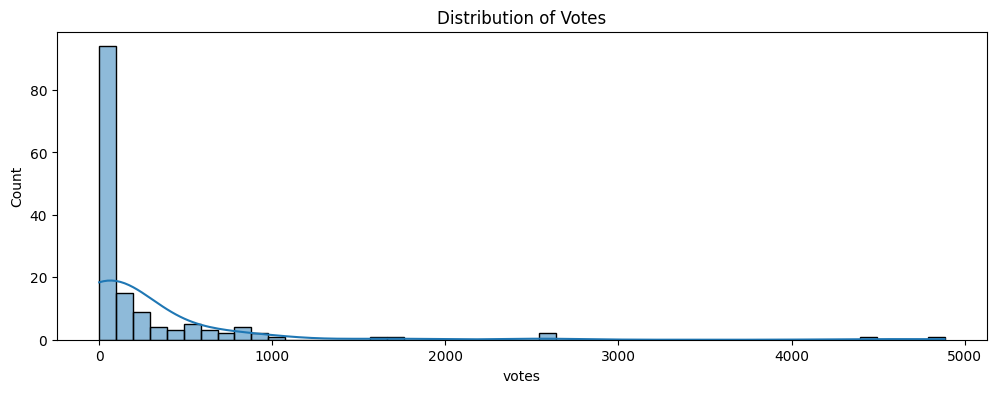

In [29]:
plt.figure(figsize=(12,4))
sns.histplot(data["votes"], bins=50, kde=True)
plt.title("Distribution of Votes")
plt.show()

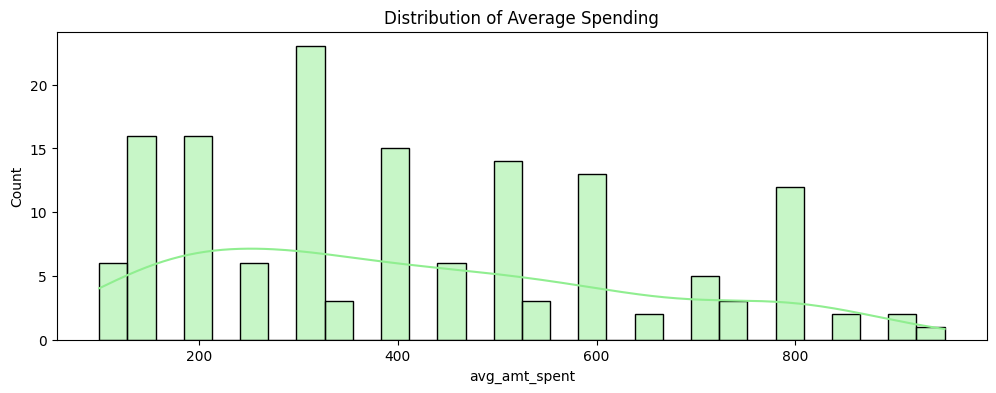

In [30]:
plt.figure(figsize=(12,4))
sns.histplot(data["avg_amt_spent"], bins=30, kde=True,color="lightgreen")
plt.title("Distribution of Average Spending")
plt.show()


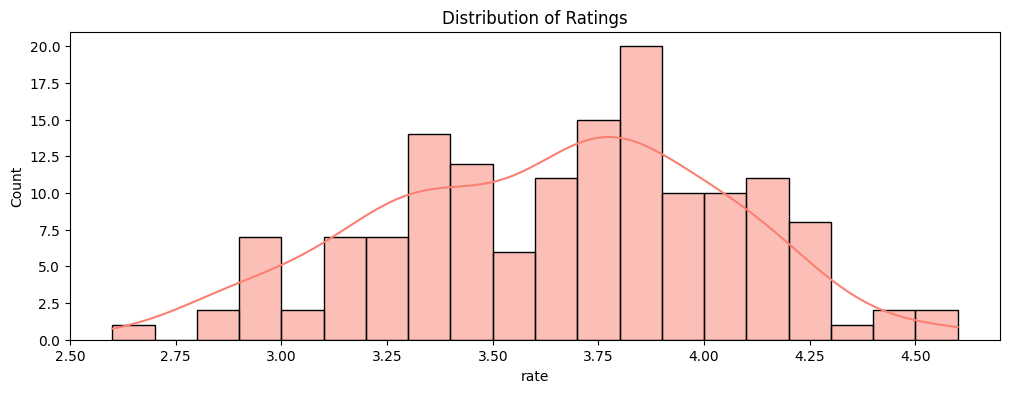

In [31]:
plt.figure(figsize=(12,4))
sns.histplot(data["rate"], bins=20, kde=True,color="salmon")
plt.title("Distribution of Ratings")
plt.show()

# Summary Plots (Subplots)

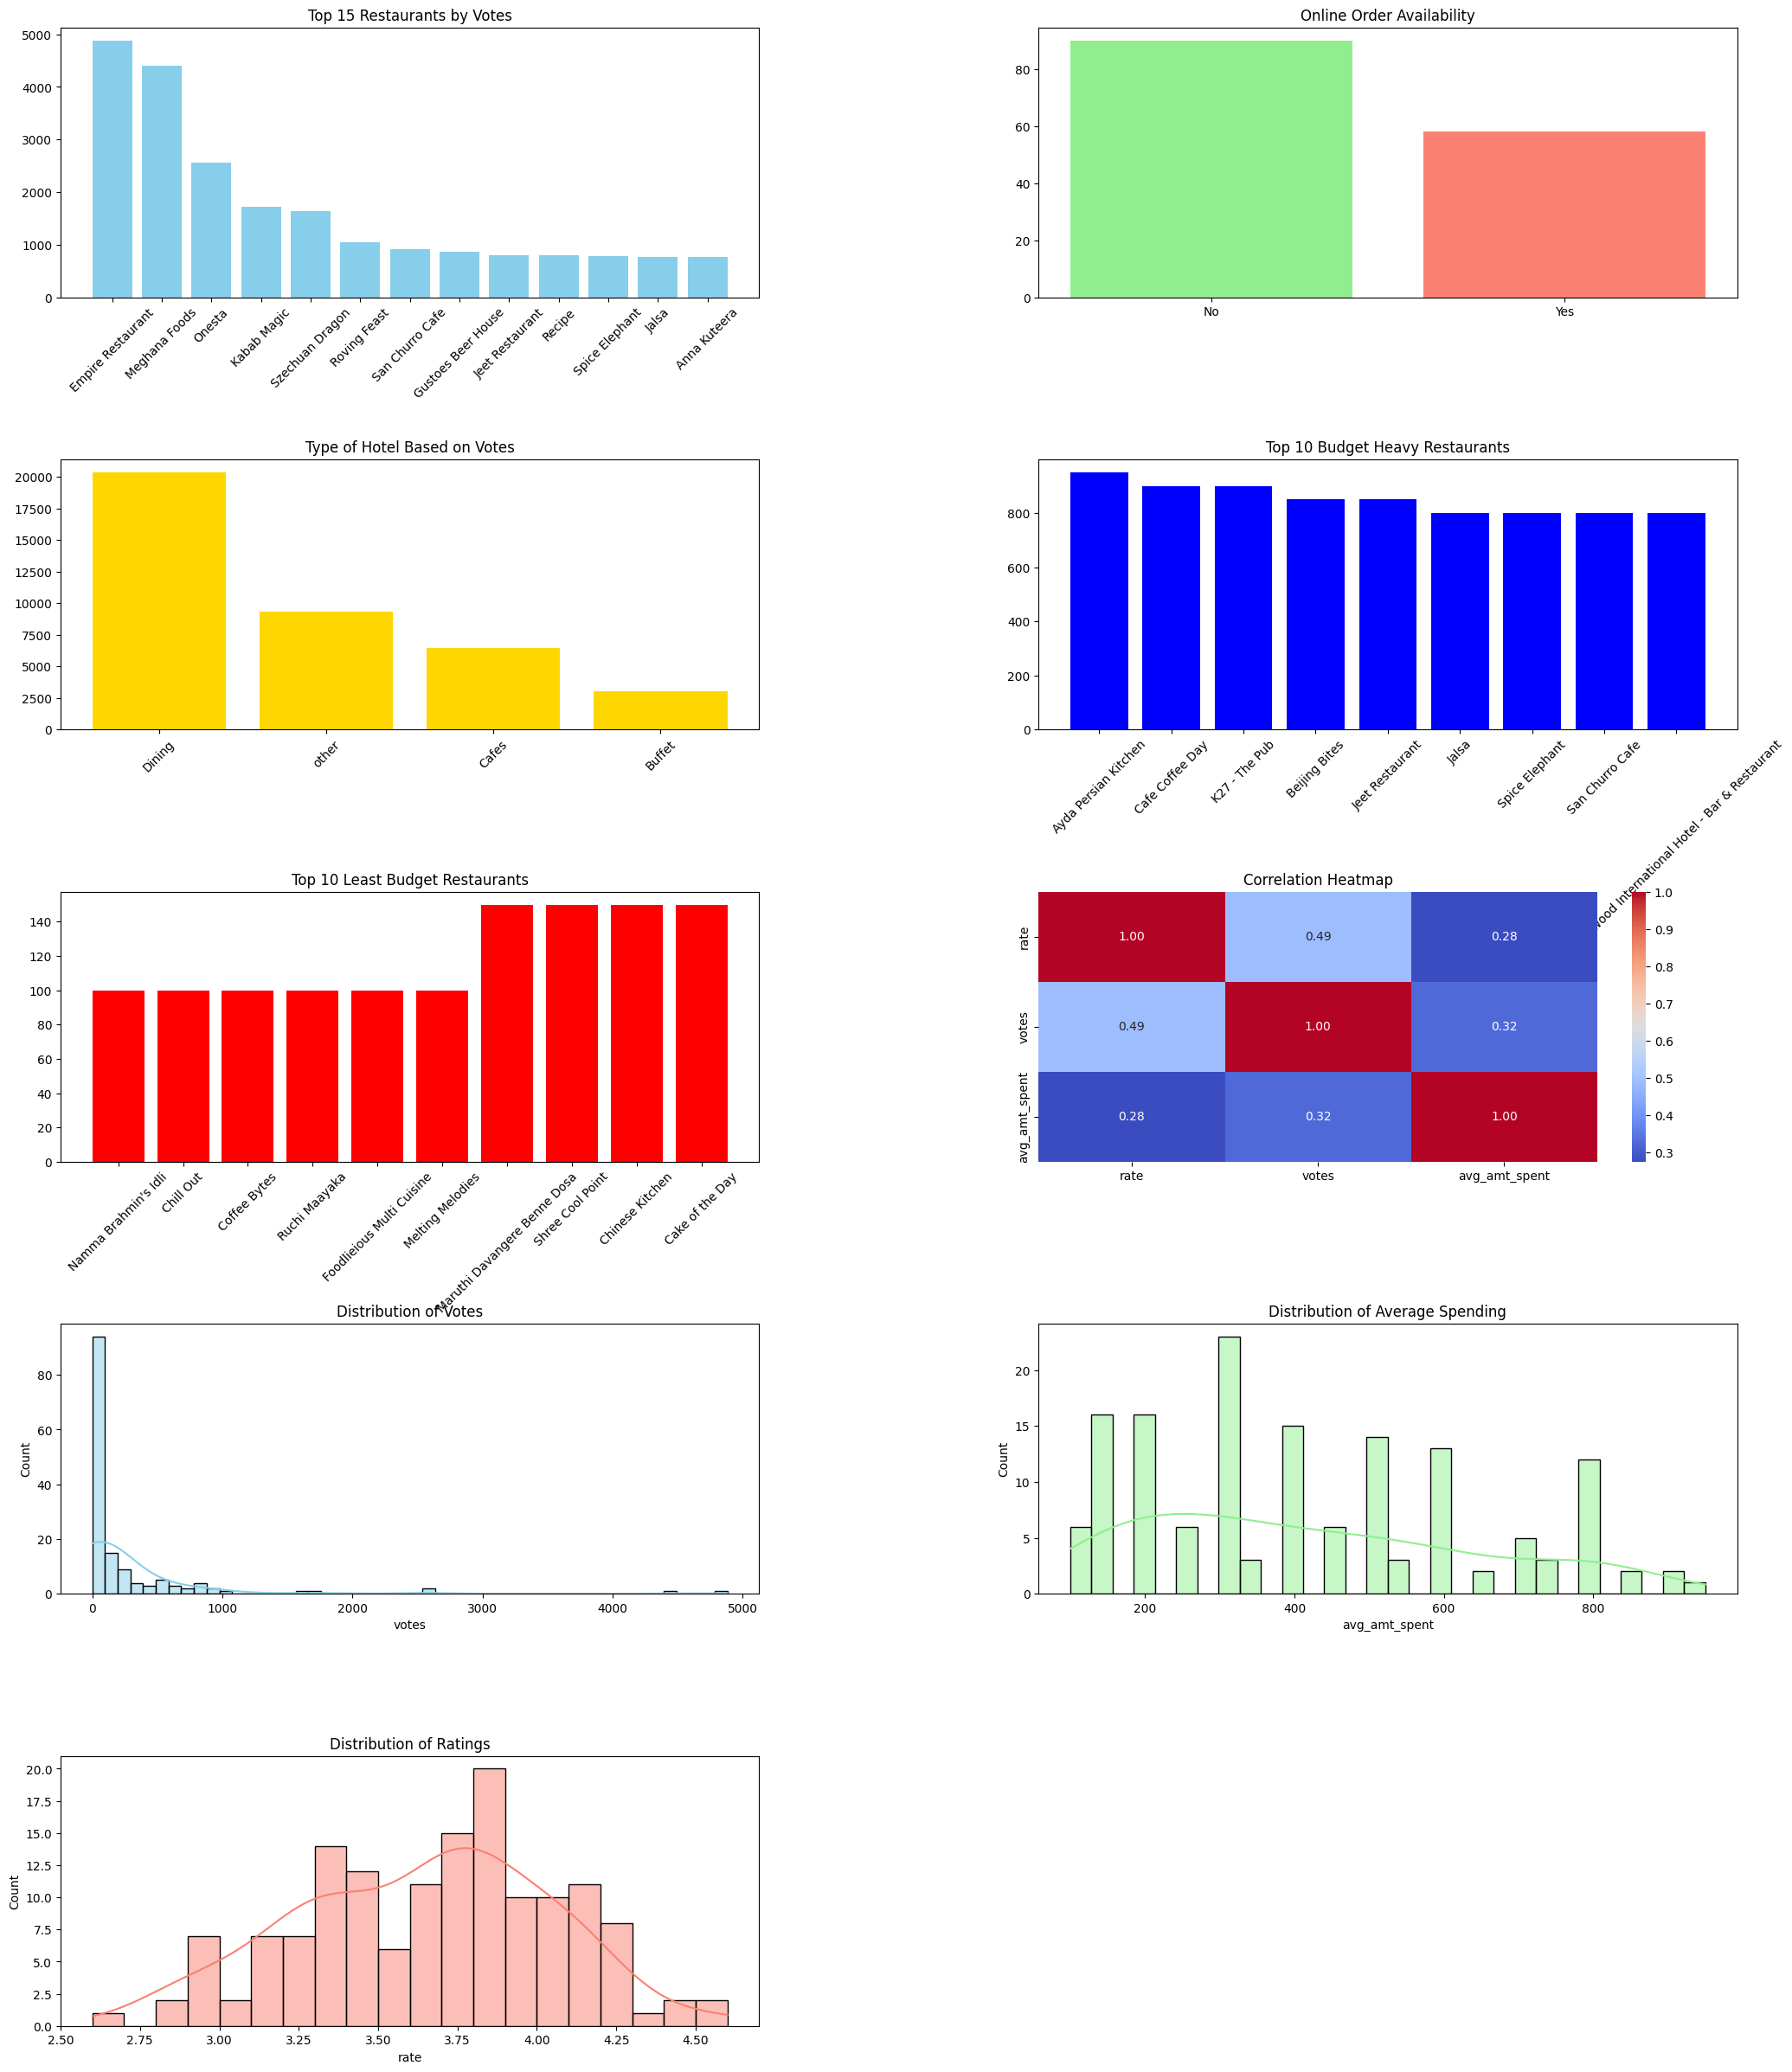

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(25,30))
plt.subplots_adjust(hspace=0.6, wspace=0.4)


# Top 15 Restaurants by Votes
axes[0,0].bar(top15_shops["name"], top15_shops["votes"], color="skyblue")
axes[0,0].set_title("Top 15 Restaurants by Votes")
axes[0,0].tick_params(axis="x", rotation=45)

# Online Order Availability
axes[0,1].bar(counts.index, counts.values, color=["lightgreen","salmon"])
axes[0,1].set_title("Online Order Availability")

# Hotel Type vs Votes
type_votes = data.groupby("listed_in(type)")["votes"].sum().sort_values(ascending=False)
axes[1,0].bar(type_votes.index, type_votes.values, color="gold")
axes[1,0].set_title("Type of Hotel Based on Votes")
axes[1,0].tick_params(axis="x", rotation=45)

# High Budget
axes[1,1].bar(top10_budget["name"], top10_budget["avg_amt_spent"], color="blue")
axes[1,1].set_title("Top 10 Budget Heavy Restaurants")
axes[1,1].tick_params(axis="x", rotation=45)

# Low Budget
axes[2,0].bar(top10_least_budget["name"], top10_least_budget["avg_amt_spent"], color="red")
axes[2,0].set_title("Top 10 Least Budget Restaurants")
axes[2,0].tick_params(axis="x", rotation=45)

# Correlation Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2,1])
axes[2,1].set_title("Correlation Heatmap")

# Distribution of Votes
sns.histplot(data["votes"], bins=50, kde=True, ax=axes[3,0], color="skyblue")
axes[3,0].set_title("Distribution of Votes")

# Distribution of Average Spending
sns.histplot(data["avg_amt_spent"], bins=30, kde=True, ax=axes[3,1], color="lightgreen")
axes[3,1].set_title("Distribution of Average Spending")

# Distribution of Ratings
sns.histplot(data["rate"], bins=20, kde=True, ax=axes[4,0], color="salmon")
axes[4,0].set_title("Distribution of Ratings")

# Empty Plot
axes[4,1].axis("off")

plt.show()